# Gradient Descent

### Learning Objectives 

* Understand how to go from RSS to finding a "best fit" line
* Understand a cost curve and what it displays

### Introduction

In the previous section, we saw how after choosing the slope and y-intercept values of a regression line, we can calculate the residual sum of squares (RSS) and related root mean squared error (RMSE).  We can use either the RSS or RMSE to calculate the accuracy of a line.  In this lesson, we'll proceed with RSS as it's the simpler of the two.

Once we have calculated the accuracy of a line, we can improve upon that line by minimizing the RSS.  This is the task of gradient descent.  But before learning about gradient descent, let's review and ensure that we understand how to evaluate how our line fits our data.  

### Review of plotting our data and a regression line

For this example, let's imagine that our data looks like the following:

In [6]:
import pandas as pd
first_movie = {'budget': 100, 'revenue': 275}
second_movie = {'budget': 200, 'revenue': 300}
third_movie = {'budget': 250, 'revenue': 550}
fourth_movie = {'budget': 325, 'revenue': 525}
fifth_movie = {'budget': 400, 'revenue': 700}

shows = [first_movie, second_movie, third_movie, fourth_movie, fifth_movie]
data_of_shows = pd.DataFrame(shows)
data_of_shows

,budget,revenue
0,100,275
1,200,300
2,250,550
3,325,525
4,400,700


In [7]:
#Descriptive statistics
data_of_shows.describe()

,budget,revenue
count,5.000000,5.00000
mean,255.000000,470.00000
std,115.108644,179.75678
min,100.000000,275.00000
25%,200.000000,300.00000
50%,250.000000,525.00000
75%,325.000000,550.00000
max,400.000000,700.00000


In [8]:
#set up independent and dependent variables
x = data_of_shows['budget']
y = data_of_shows['revenue']
#plot the data to see if those data have linear relationship 
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.xlabel('Budget',fontsize = 20)
plt.ylabel('Revenue',fontsize = 20)
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

In [9]:
from sklearn.linear_model import LinearRegression
x1=x.values.reshape(-1,1)
reg = LinearRegression()
reg.fit(x1,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
reg.score(x1,y)

0.8515222984562606

In [11]:
# To get coefficient
m=(reg.coef_)[0]
m

1.441037735849057

In [12]:
# To get intercept
b=reg.intercept_
b

102.5353773584905

In [13]:
# Predict values of y called y_hat
y_hat = x*m+b
y_hat

0    246.639151
1    390.742925
2    462.794811
3    570.872642
4    678.950472
Name: budget, dtype: float64

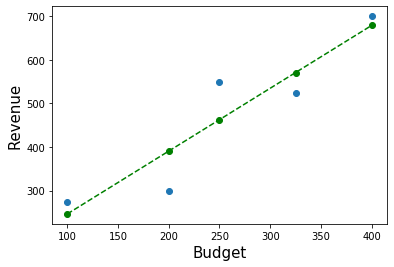

In [14]:
#plot y and y_hat 
plt.scatter(x,y)
plt.plot(x,y_hat,"go--")
plt.xlabel('Budget',fontsize = 15)
plt.ylabel('Revenue',fontsize = 15)
plt.show()

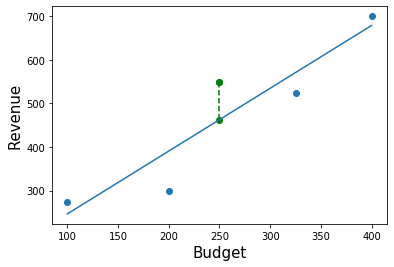

In [15]:
# if I want to plot the distance of error then we can do this 
def plot_error(x,y,m,b,x_value):
    x_list=list(x)
    i = x_list.index(x_value)
    yi=y[i]
    y_hat_i=m*x_value+b
    x_error=[x_value,x_value]
    y_error=[yi,y_hat_i]
    
    plt.scatter(x,y)
    plt.plot(x_error,y_error,'go--')
    plt.plot(x,y_hat)
    plt.xlabel('Budget',fontsize = 15)
    plt.ylabel('Revenue',fontsize = 15)
    plt.show()
    
    
plot_error(x,y,m,b,x[2])  

In [26]:
# Error /squared error /squared errors/RSS/sqrt of RSS
def errors(x,y):
    x1=x.values.reshape(-1,1)
    reg = LinearRegression()
    reg.fit(x1,y)
    m=(reg.coef_)[0]
    b=reg.intercept_
    y_hat = x*m+b
    errors_list=[]
    for i in range(len(x)):
        error = y[i]-y_hat[i]
        errors_list.append(error)
    return errors_list
        
    
    
   

errors=errors(x,y)
errors

[28.360849056603797,
 -90.7429245283019,
 87.20518867924528,
 -45.87264150943406,
 21.049528301886767]

In [24]:
def squared_errors(y,y_hat):
    
squared_errors(y,y_hat)

TypeError: 'list' object is not callable

In [15]:
def RSS(errors):
    return sum(squared_errors(errors))

RSS(errors)


19190.742924528317

In [16]:
import math

def RMSE(errors):
    return math.sqrt(RSS(errors)/len(errors))

RMSE(errors)


61.952793196962986

> Press shift + enter

Let's again come up with some numbers for a slope and a y-intercept.  

>Remember that our technique so far is to get at the slope by drawing a line between the first and last points.  And from there, we calculate the value of $b$.  Our `build_regression_line` function, defined in our [linear_equations library](https://github.com/learn-co-curriculum/gradient-descent/blob/master/linear_equations.py), quickly does this for us.

So let's convert our data above into a list of `x_values`, budgets, and `y_values`, revenues, and pass them into our `build_regression_line` function. 

In [18]:
from linear_equations import build_regression_line

budgets = list(map(lambda show: show['budget'], shows))
revenues = list(map(lambda show: show['revenue'], shows))

build_regression_line(budgets, revenues)

{'m': 1.4166666666666667, 'b': 133.33333333333326}

Turning this into a regression formula, we have the following:

In [19]:
def regression_formula(x):
    return 1.417*x + 133.33

Let's plot this regression formula with our data to get a sense of what it looks like. 

In [20]:
# First import the `plotly` libraries and functions in our notebook. 
import plotly
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

# then import our graph functions
from graph import m_b_trace, trace_values, plot

regression_trace = m_b_trace(1.417, 133.33, budgets)
scatter_trace = trace_values(budgets, revenues)
plot([regression_trace, scatter_trace])

### Evaluating the regression line

Ok, now we add in our functions for displaying the errors for our graph.

In [21]:
from graph import trace, plot, line_function_trace

def y_actual(x, x_values, y_values):
    combined_values = list(zip(x_values, y_values))
    point_at_x = list(filter(lambda point: point[0] == x,combined_values))[0]
    return point_at_x[1]

def error_line_trace(x_values, y_values, m, b, x):
    y_hat = m*x + b
    y = y_actual(x, x_values, y_values)
    name = 'error at ' + str(x)
    error_value = y - y_hat
    return {'x': [x, x], 'y': [y, y_hat], 'mode': 'lines', 'marker': {'color': 'red'}, 'name': name, 'text': [error_value], 'textposition':'top right'}

def error_line_traces(x_values, y_values, m, b):
    return list(map(lambda x_value: error_line_trace(x_values, y_values, m, b, x_value), x_values))

errors = error_line_traces(budgets, revenues, 1.417, 133.33)
plot([scatter_trace, regression_trace, *errors])

From there, we calculate the `residual sum of squared errors` and the `root mean squared error`:

In [22]:
import math
def error(x_values, y_values, m, b, x):
    expected = (m*x + b)
    return (y_actual(x, x_values, y_values) - expected)

def squared_error(x_values, y_values, m, b, x):
    return round(error(x_values, y_values, m, b, x)**2, 2)

def squared_errors(x_values, y_values, m, b):
    return list(map(lambda x: squared_error(x_values, y_values, m, b, x), x_values))

def residual_sum_squares(x_values, y_values, m, b):
    return round(sum(squared_errors(x_values, y_values, m, b)), 2)

def root_mean_squared_error(x_values, y_values, m, b):
    return round(math.sqrt(sum(squared_errors(x_values, y_values, m, b))/len(x_values)), 2)

squared_errors(budgets, revenues, 1.417, 133.33) #[0.0, 13625.89, 3896.26, 4741.01, 0.02]
residual_sum_squares(budgets, revenues, 1.417, 133.33) # 22263.18
root_mean_squared_error(budgets, revenues, 1.417, 133.33) # 66.73

66.73

### Moving towards gradient descent

Now that we have the residual sum of squares function to evaluate the accuracy of our regression line, we can simply try out different regression lines and use the regression line that has the lowest RSS.  The regression line that produces the lowest RSS for a given dataset is called the "best fit" line for that dataset.  

So this will be our technique for finding our "best fit" line:

> * Choose a regression line with a guess of values for $m$ and $b$
> * Calculate the RSS
> * Adjust $m$ and $b$, as these are the only things that can vary in a single-variable regression line.
> * Again calculate the RSS 
> * Repeat this process
> * The regression line (that is, the values of $b$ and $m$) with the smallest RSS is our **best fit line**

We'll eventually tweak and improve upon that process, but for now it will do.  In fact, we will make things even easier at first by holding $m$ fixed to a constant value while we experiment with different $b$ values.  In later lessons, we will change both variables.

#### Updating the regression line to improve accuracy

Ok, so we have a regression line of $\hat{y} = mx + b $, and we started with values of $m = 1.417 $ and $b = 133.33 $.  Then seeing how well this regression line matched our dataset, we calculated that $ RSS = 22,263.18 $.  Our next step is to plug in different values of $b$ and see how RSS changes.  Let's try $b$ = 140 instead of $133.33$.

In [23]:
residual_sum_squares(budgets, revenues, 1.417, 140)

24130.78

Now let's the RSS for a variety of $b$ values.

In [24]:
def residual_sum_squares_errors(x_values, y_values, regression_lines):
    errors = []
    for regression_line in regression_lines:
        error = residual_sum_squares(x_values, y_values, regression_line[0], regression_line[1])
        errors.append([regression_line[0], regression_line[1], round(error, 0)])
    return errors

In [25]:
b_values = list(range(70, 150, 10))

m_values = [1.417]*8
regression_lines = list(zip(m_values, b_values))
regression_lines

[(1.417, 70),
 (1.417, 80),
 (1.417, 90),
 (1.417, 100),
 (1.417, 110),
 (1.417, 120),
 (1.417, 130),
 (1.417, 140)]

In [26]:
rss_lines = residual_sum_squares_errors(budgets, revenues, regression_lines)
rss_lines

[[1.417, 70, 26696.0],
 [1.417, 80, 23330.0],
 [1.417, 90, 20963.0],
 [1.417, 100, 19597.0],
 [1.417, 110, 19230.0],
 [1.417, 120, 19864.0],
 [1.417, 130, 21497.0],
 [1.417, 140, 24131.0]]

| b        | residual sum of squares           | 
| ------------- |:-------------:| 
| 140| 24131
| 130      |21497| 
| 120      |19864 | 
| 110      |19230| 
|100 | 19597
|90 | 20963
|80 | 23330
|70| 26696

Notice what the above chart represents.  While keeping our value of $m$ fixed at 1.417, we moved towards a smaller residual sum of squares (RSS) by changing our value of $b$, our y-intercept. 

Setting $b$ to 130 produced a lower error than at 140.  We kept moving our $b$ value lower until we set $b$ = 100, at which point our error began to increase.  Therefore, we know that a value of $b$ between 110 and 100 produces the smallest RSS for our data while $m = 1.417$. 

This changing output of RSS based on a changing input of different regression lines is called our **cost function**.  Let's plot this chart to see it better.

We set:

* `b_values` as the input values (x values), and
* `rss_errors` as the output values (y values)

In [27]:
b_values = list(range(70, 150, 10))

# remember that each element in rss_lines has the m value, b value, and related rss error
# rss_lines[0] => [1.417, 70, 26696.0]
# so we collect the rss errors for each regression line  
rss_errors = list(map(lambda line: line[-1], rss_lines))

In [28]:
import plotly
from plotly.offline import init_notebook_mode, iplot
from graph import m_b_trace, trace_values, plot
init_notebook_mode(connected=True)


cost_curve_trace = trace_values(b_values, rss_errors, mode="lines")
plot([cost_curve_trace])

The graph above is called the **cost curve**.  It is a plot of the RSS for different values of $b$.    The curve demonstrates that when $b$ is between 100 and 120, the RSS is lowest.  This technique of optimizing towards a minimum value is called *gradient descent*.  Here, we *descend* along a cost curve.  As we change our variable, we need to stop when the value of our RSS no longer decreases.

### Summary

In this section we saw the path from going from calculating the RSS for a given regression line, to finding a line that minimizes our RSS - a best fit line.  We learned that we can move to a better regression line by descending along our cost curve.  Going forward, we will learn how to move towards our best fit line in an efficient manner. 